<a href="https://colab.research.google.com/github/skrzypczykt/MAchineLearningProjects/blob/main/Linear%20and%20Logistic%20Regression/Graficzna_ocena_klasyfikator%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

data = np.genfromtxt('/content/data_ROC_PR.txt',
                     skip_header=0,
                     skip_footer=0,
                     names=True,
                     dtype=float,
                     delimiter=',')
df = pd.DataFrame(data)


In [ ]:
train,test = train_test_split(df,  random_state=0)

X_train,X_test, y_train,y_test  = train.drop(['y'],axis=1),test.drop(['y'],axis=1),train['y'],test['y']

In [ ]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Random: ROC AUC=0.500
Logistic: ROC AUC=0.833


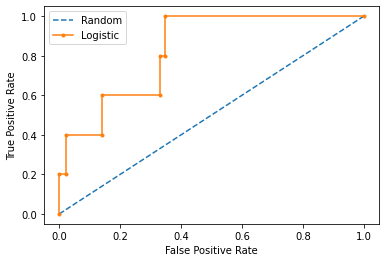

In [ ]:

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Nieznaczny wzrost AUC od poziomu modelu *Random* zwracającego klasę większościową. Bardzo duży przeskok w okolicy False Positive Rate = 0.35. Nie jest to najlepszy klasyfikator.

Ta krzywa wypada znacznie gorzej niż ta z ćwiczeń:

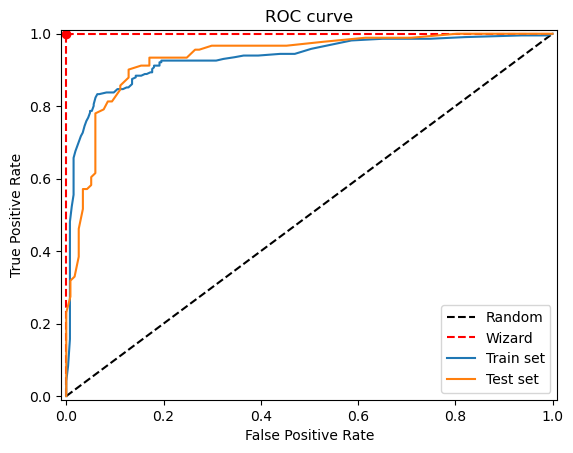
---



PR-Curve

Logistic: f1=0.286 auc=0.277


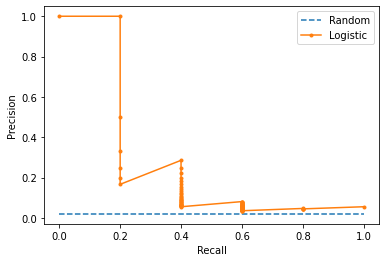

In [ ]:
from sklearn.metrics import f1_score
# calculate precision-recall curve
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Większość wykresu jest zbliżona do modelu Random. Działąnie klasyfikatora jest bliższe przypadkowemu niż idealnemu. Bardzo szybko precyzja modelu spada.